训练模型时在`work_dirs`目录生成记录训练日志，解析其中损失函数、评估指标等信息，并可视化。

In [17]:
import os
import workspace_path
os.chdir(workspace_path.path)

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  # windows中用来正常显示中文标
plt.rcParams['axes.unicode_minus']=False  # windows中用来正常显示负号

## 载入训练日志

In [19]:
# 日志文件路径
# full_log_path = 'myFolder/work_dirs/ZihaoDataset-FastSCNN/20230808_033757/vis_data/scalars.json'
# single_log_path = 'myFolder/work_dirs/ZihaoDataset-FastSCNN/20230808_033757/20230808_033757.log'

full_log_path = 'myFolder/work_dirs/ZihaoDataset-DeepLabV3plus/20230808_135009/vis_data/scalars.json'
single_log_path = 'myFolder/work_dirs/ZihaoDataset-DeepLabV3plus/20230808_135009/20230808_135009.log'

In [20]:
with open(full_log_path, "r") as f:
    json_list = f.readlines()
print('日志文件的长度为: ',len(json_list))
json_list

日志文件的长度为:  241


['{"lr": 0.009998774851262377, "data_time": 0.011287546157836914, "loss": 1.8389673709869385, "decode.loss_ce": 1.2810435175895691, "decode.acc_seg": 60.022735595703125, "aux.loss_ce": 0.5579238623380661, "aux.acc_seg": 69.98109436035156, "time": 0.9936009883880615, "iter": 12, "memory": 11266, "step": 12}\n',
 '{"lr": 0.009988973054603395, "data_time": 0.011713957786560059, "loss": 0.7249412894248962, "decode.loss_ce": 0.5184236645698548, "decode.acc_seg": 82.13090515136719, "aux.loss_ce": 0.20651762187480927, "aux.acc_seg": 83.1695556640625, "time": 0.9982634782791138, "iter": 100, "memory": 10605, "step": 100}\n',
 '{"lr": 0.009977833338763812, "data_time": 0.012134480476379394, "loss": 0.730824875831604, "decode.loss_ce": 0.5273023903369903, "decode.acc_seg": 83.80441284179688, "aux.loss_ce": 0.20352249071002007, "aux.acc_seg": 86.06118774414062, "time": 0.9988431215286255, "iter": 200, "memory": 10605, "step": 200}\n',
 '{"lr": 0.009966692226882018, "data_time": 0.0104223489761352

In [21]:
import pandas as pd
df_train = pd.DataFrame()   # 二维数据表
df_test = pd.DataFrame()
for each in json_list[:-1]:
    if 'aAcc' in each:
        df_test = df_test._append(eval(each), ignore_index = True)
    else:
        df_train = df_train._append(eval(each), ignore_index=True)

In [22]:
df_train

,lr,data_time,loss,decode.loss_ce,decode.acc_seg,aux.loss_ce,aux.acc_seg,time,iter,memory,step
0,0.009999,0.011288,1.838967,1.281044,60.022736,0.557924,69.981094,0.993601,12.0,11266.0,12.0
1,0.009989,0.011714,0.724941,0.518424,82.130905,0.206518,83.169556,0.998263,100.0,10605.0,100.0
2,0.009978,0.012134,0.730825,0.527302,83.804413,0.203522,86.061188,0.998843,200.0,10605.0,200.0
3,0.009967,0.010422,0.604600,0.423975,90.796188,0.180625,90.883827,0.998782,300.0,10605.0,300.0
4,0.009956,0.011105,0.471672,0.335383,76.091293,0.136289,79.097366,0.999099,400.0,10605.0,400.0
...,...,...,...,...,...,...,...,...,...,...,...
196,0.007788,0.010261,0.084941,0.057438,97.266678,0.027503,96.401215,0.996886,19600.0,10605.0,19600.0
197,0.007776,0.010628,0.078987,0.053298,98.170181,0.025688,97.987076,0.997729,19700.0,10605.0,19700.0
198,0.007765,0.010202,0.110463,0.070610,97.729401,0.039853,97.670837,0.996408,19800.0,10605.0,19800.0
199,0.007753,0.009851,0.166298,0.104974,90.565582,0.061323,86.272049,0.997621,19900.0,10605.0,19900.0


In [23]:
df_test

,aAcc,mIoU,mAcc,mDice,mFscore,mPrecision,mRecall,data_time,time,step
0,90.74,56.78,64.08,65.04,78.05,83.87,64.08,0.028943,2.554369,500.0
1,94.48,73.57,81.45,83.37,83.37,88.64,81.45,0.010749,0.417730,1000.0
2,87.28,58.39,74.89,71.83,71.83,76.05,74.89,0.009694,0.388544,1500.0
3,94.91,77.04,86.23,86.29,86.29,87.58,86.23,0.009025,0.412043,2000.0
4,86.68,68.20,81.28,79.05,79.05,83.81,81.28,0.008285,0.386737,2500.0
5,90.41,71.91,85.48,82.68,82.68,82.29,85.48,0.008916,0.387720,3000.0
6,94.60,76.93,86.57,86.39,86.39,87.02,86.57,0.011020,0.388659,3500.0
7,94.40,75.02,83.08,84.57,84.57,89.59,83.08,0.008806,0.388951,4000.0
8,94.67,75.23,81.73,84.99,84.99,90.63,81.73,0.010462,0.426299,4500.0
9,87.05,69.20,81.37,80.16,80.16,85.90,81.37,0.009100,0.388283,5000.0


## 导出训练日志表格

In [24]:
df_train.to_csv('myFolder/chart/FastSCNN-train.csv',index=False)
df_test.to_csv('myFolder/chart/FastSCNN-test.csv',index=False)

## 总体所有类别可视化

In [25]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

### 训练集损失函数

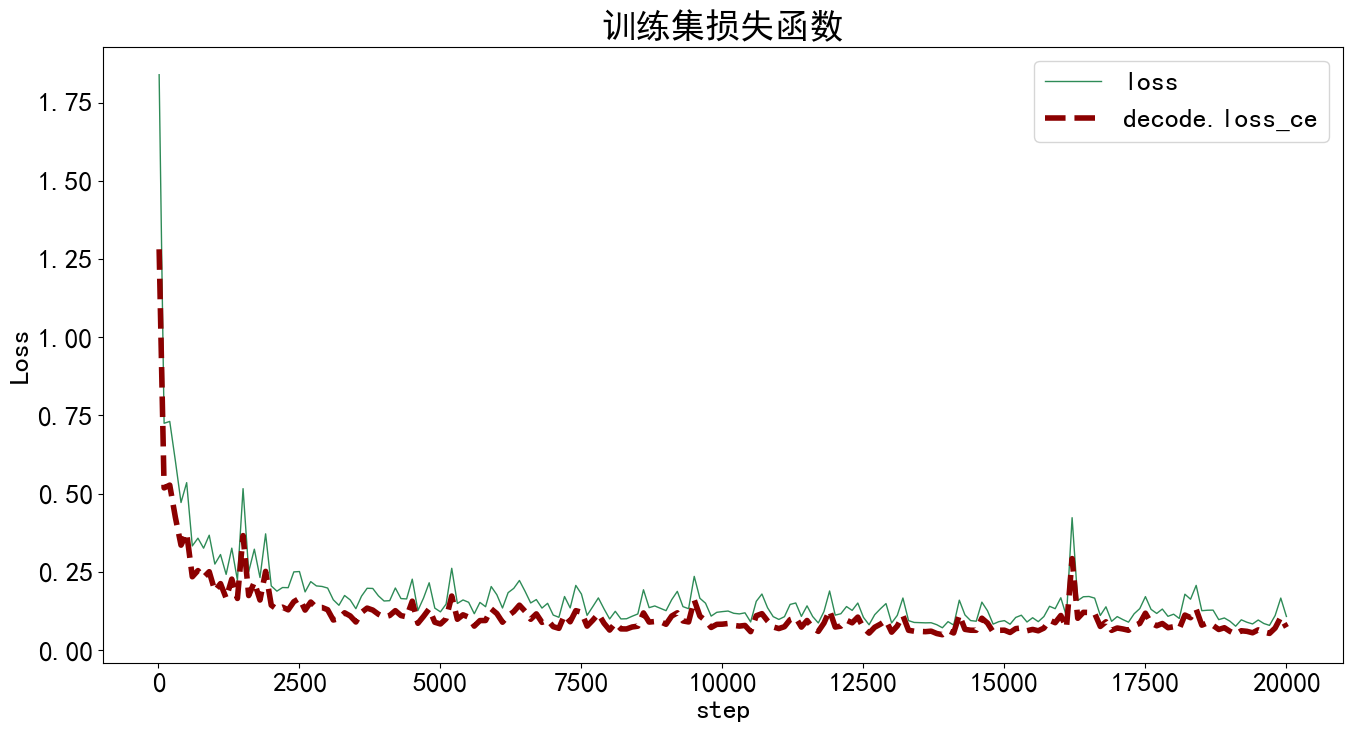

In [26]:
metrics = ['loss', 'decode.loss_ce', 'aux_0.loss_ce' ,'aux_1.loss_ce']

plt.figure(figsize=(16, 8))
x = df_train['step']
for y in metrics:
    try:
        # 绘制折线图，x轴为训练步骤，y轴为对应的指标数据。label=y会在图例中显示指标名称 
        plt.plot(x, df_train[y], label=y, **get_line_arg() )
    except: 
        pass
plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.title('训练集损失函数', fontsize=25)
plt.legend(fontsize=20)
plt.savefig('myFolder/chart/FastSCNN-训练集损失函数.pdf', dpi=120, bbox_inches='tight')
plt.show()

### 训练集准确率

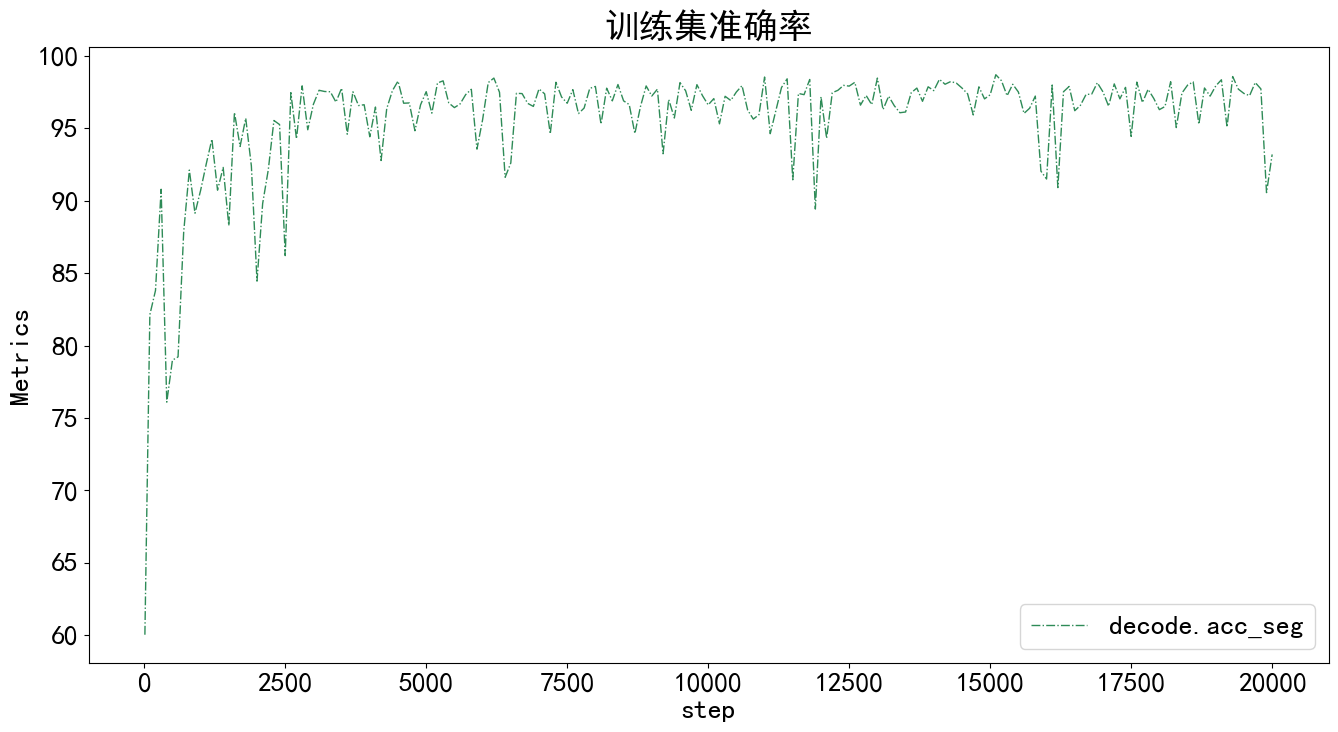

In [27]:
metrics = ['decode.acc_seg', 'aux_0.acc_seg', 'aux_1.acc_seg']
plt.figure(figsize=(16, 8))
x = df_train['step']
for y in metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass
plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title('训练集准确率', fontsize=25)
plt.legend(fontsize=20)

plt.savefig('myFolder/chart/FastSCNN-训练集准确率.pdf', dpi=120, bbox_inches='tight')

plt.show()

### 测试集评估指标

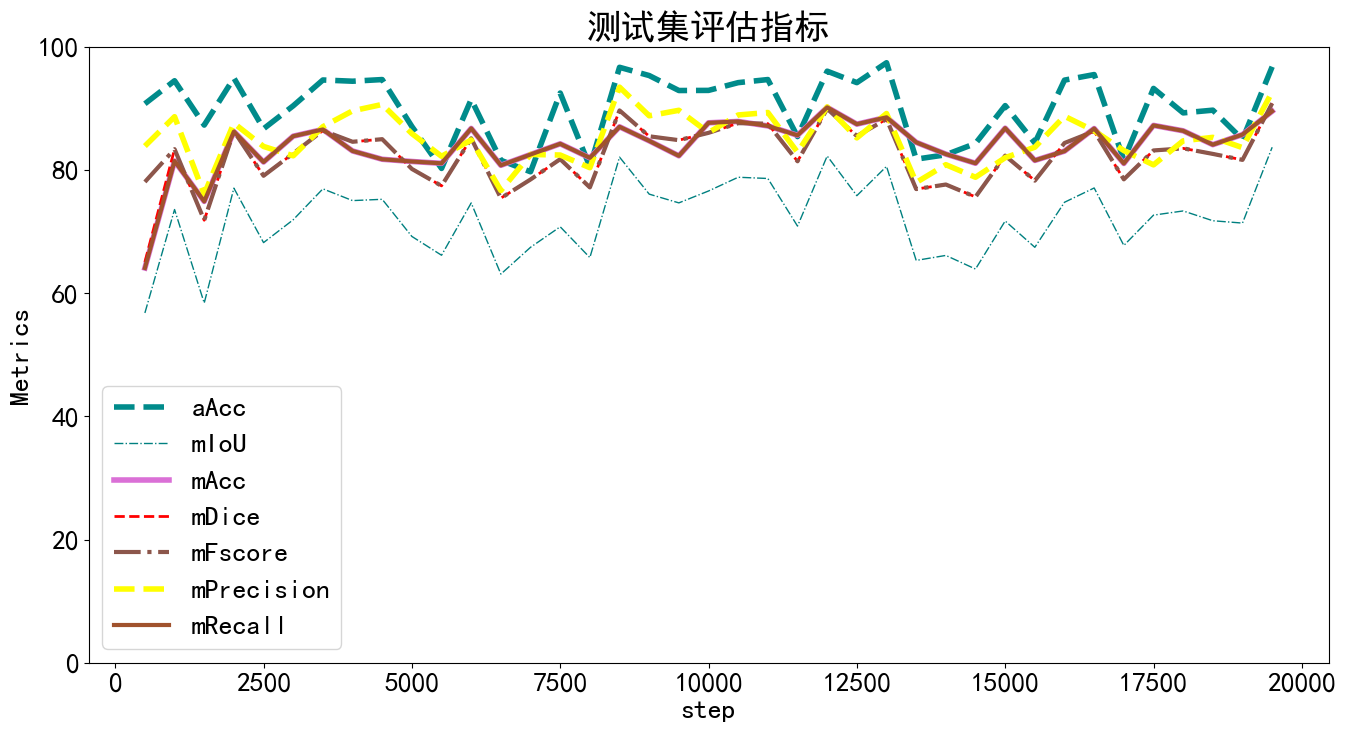

In [28]:
metrics = ['aAcc', 'mIoU', 'mAcc', 'mDice', 'mFscore', 'mPrecision', 'mRecall']

plt.figure(figsize=(16, 8))
x = df_test['step']
for y in metrics:
    try:
        plt.plot(x, df_test[y], label=y, **get_line_arg())
    except:
        pass
plt.tick_params(labelsize=20)
plt.ylim([0, 100])
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title('测试集评估指标', fontsize=25)
plt.legend(fontsize=20)
plt.savefig('myFolder/chart/FastSCNN-测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')
plt.show()

## 单个语义类别可视化

In [29]:
# 类别列表
class_list = ['background', 'red', 'green', 'white', 'seed-black', 'seed-white']

In [30]:
with open(single_log_path, 'r') as f:
    logs = f.read()

In [31]:
## 定义正则表达式
import re
import numpy as np

def transform_table_line(raw):
    raw = list(map(lambda x: x.split('|'), raw))
    raw = list(map(
        lambda row: list(map(
            lambda col: float(col.strip()),
            row
        )),
        raw
    ))
    return raw

metrics_json = {}
for each_class in class_list: # 遍历每个类别
    re_pattern = r'\s+{}.*?\|(.*)?\|'.format(each_class) # 定义该类别的正则表达式
    metrics_json[each_class] = {}
    metrics_json[each_class]['re_pattern'] = re.compile(re_pattern)
# 匹配
for each_class in class_list: # 遍历每个类别
    find_string = re.findall(metrics_json[each_class]['re_pattern'], logs) # 粗匹配
    find_string = transform_table_line(find_string) # 精匹配
    metrics_json[each_class]['metrics'] = find_string

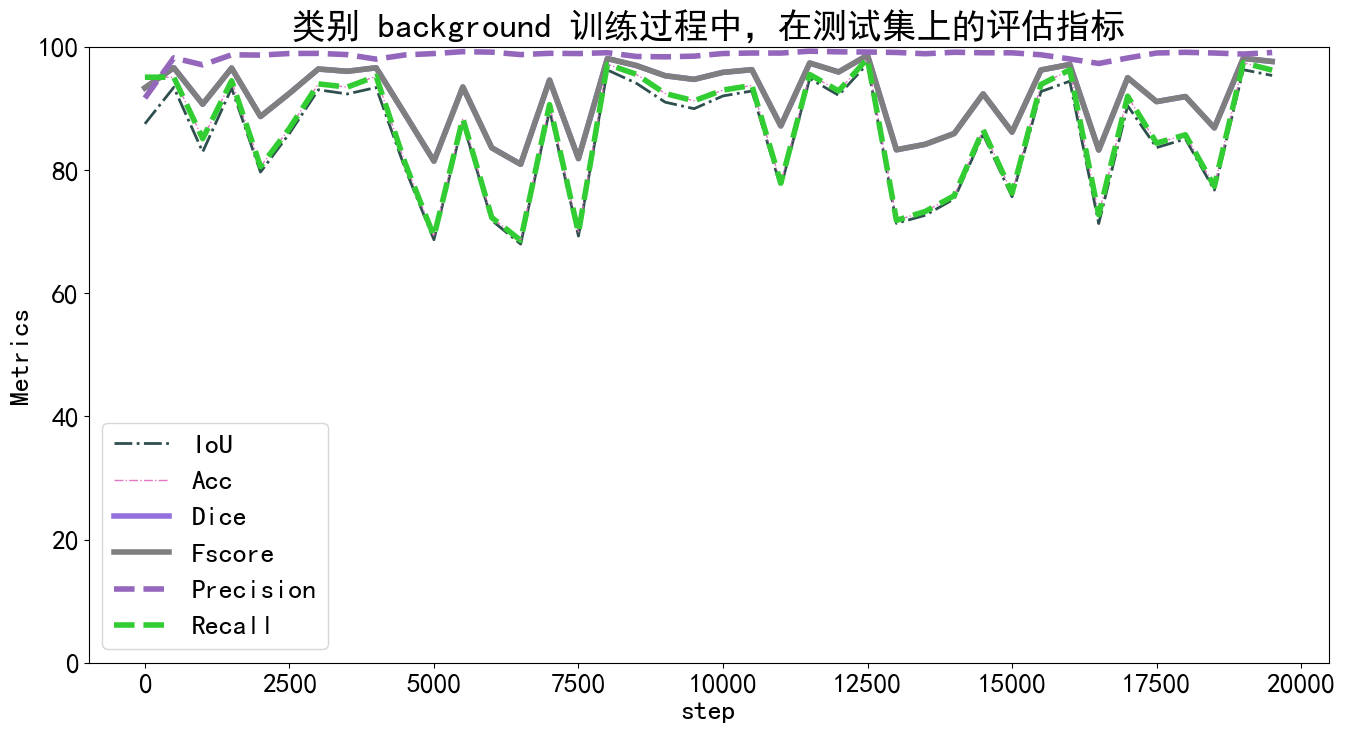

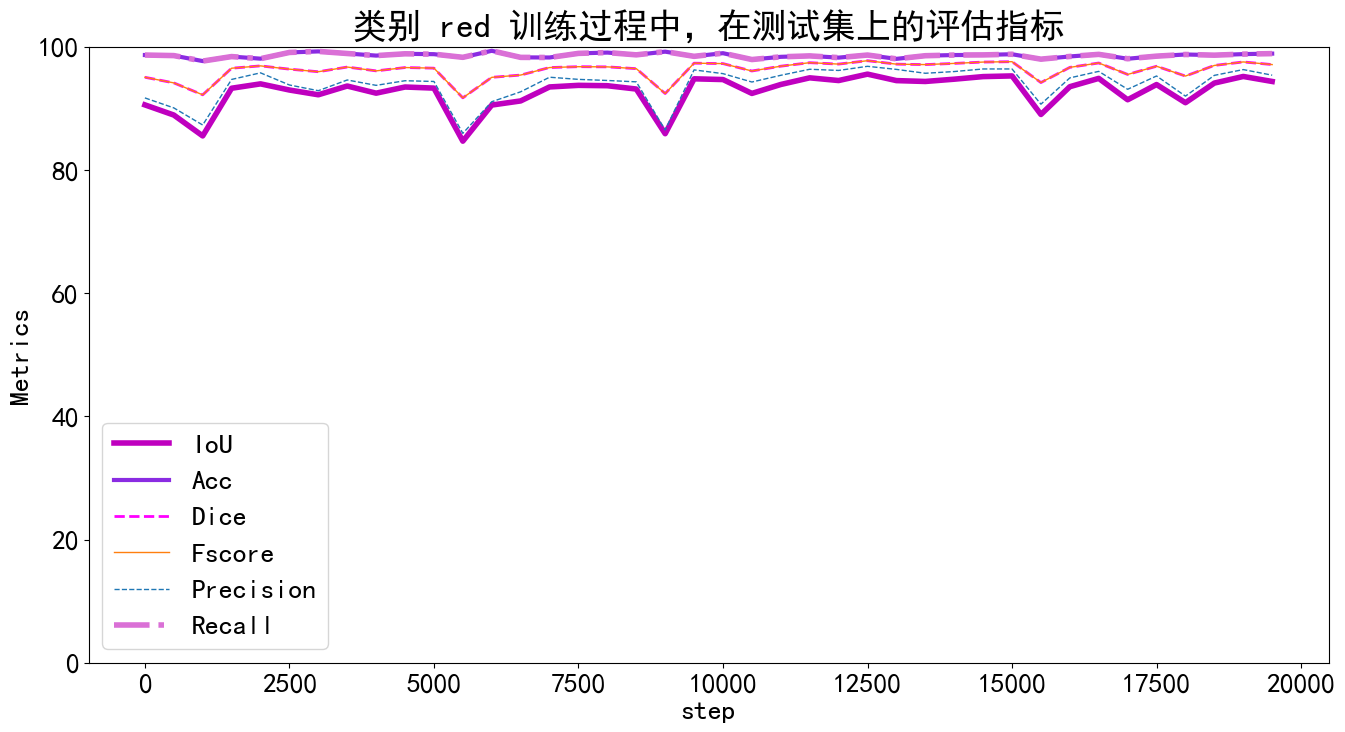

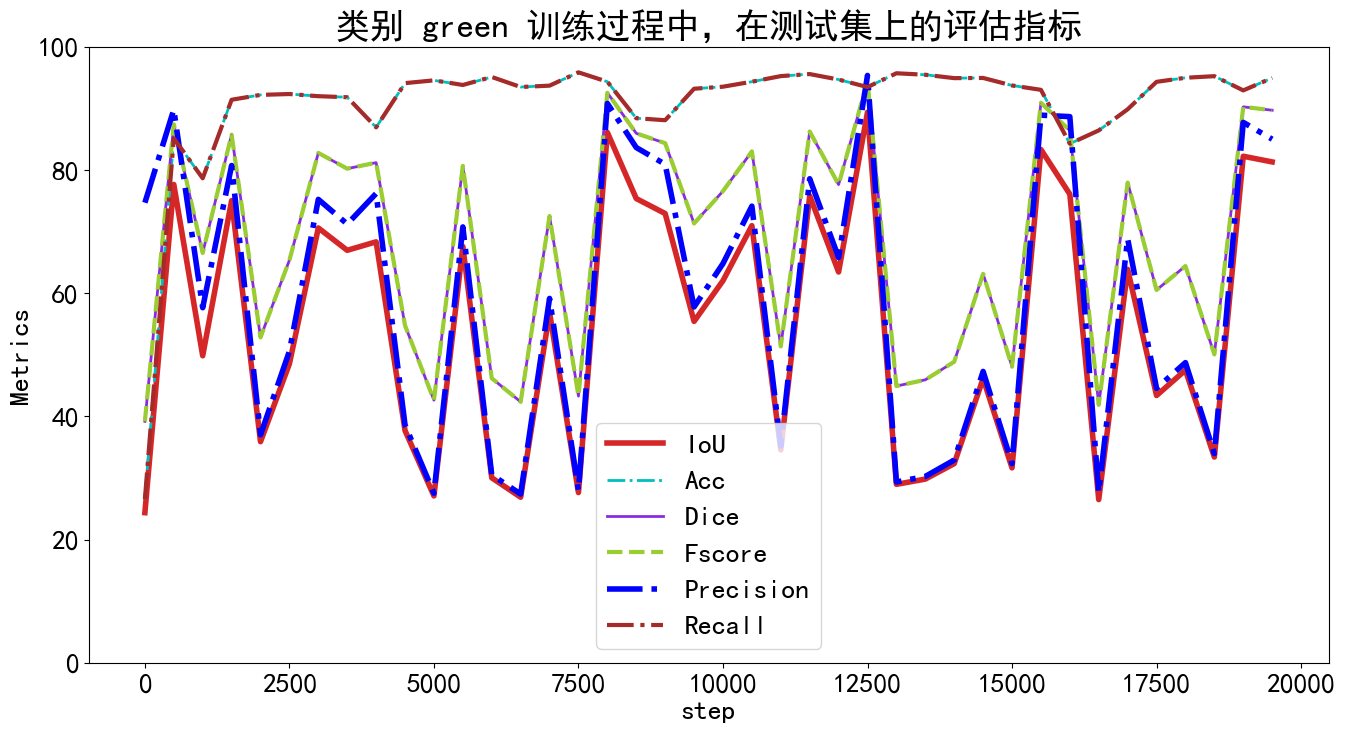

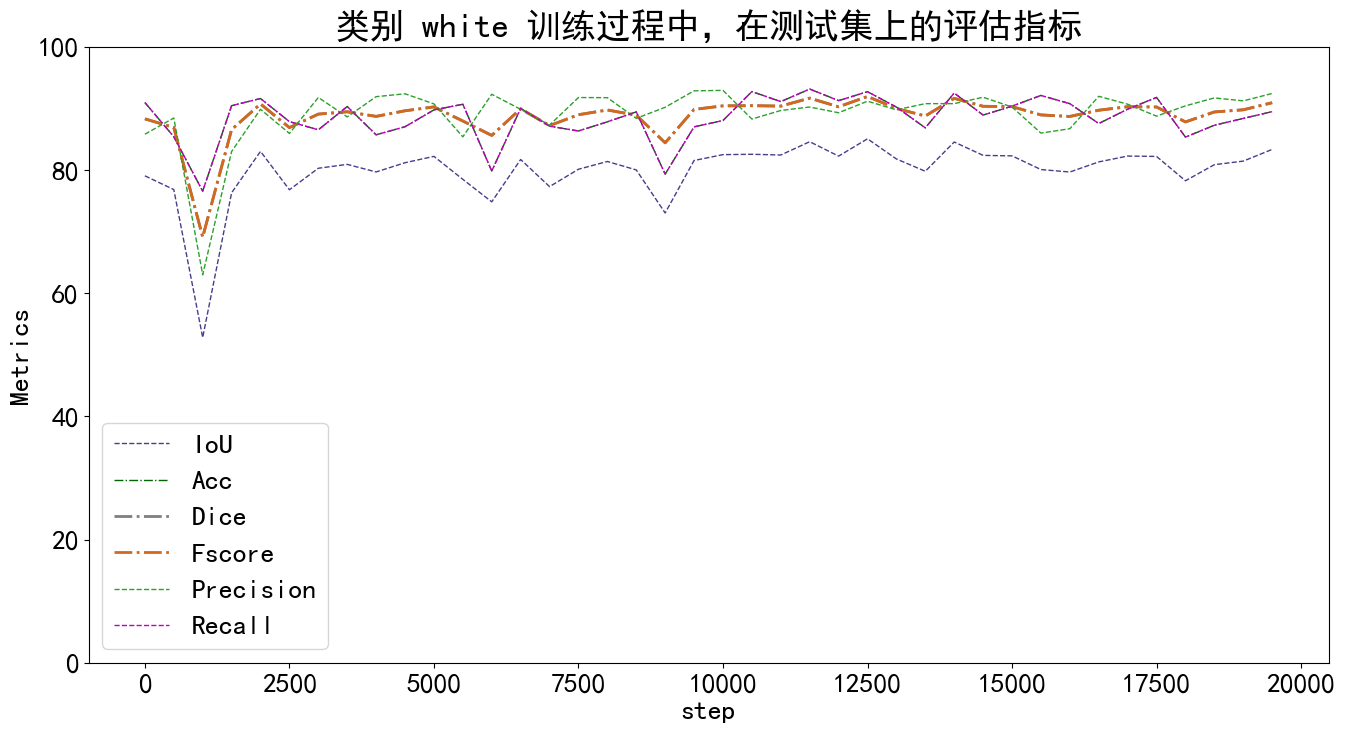

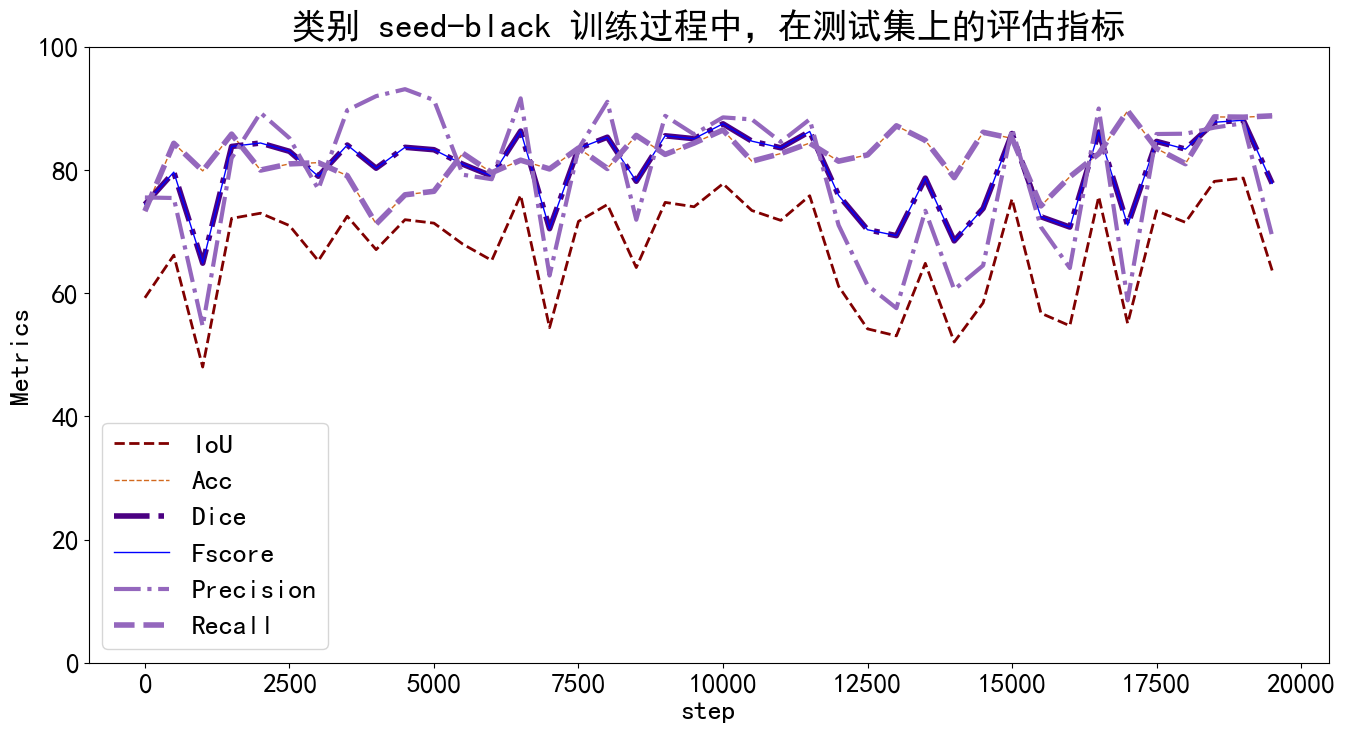

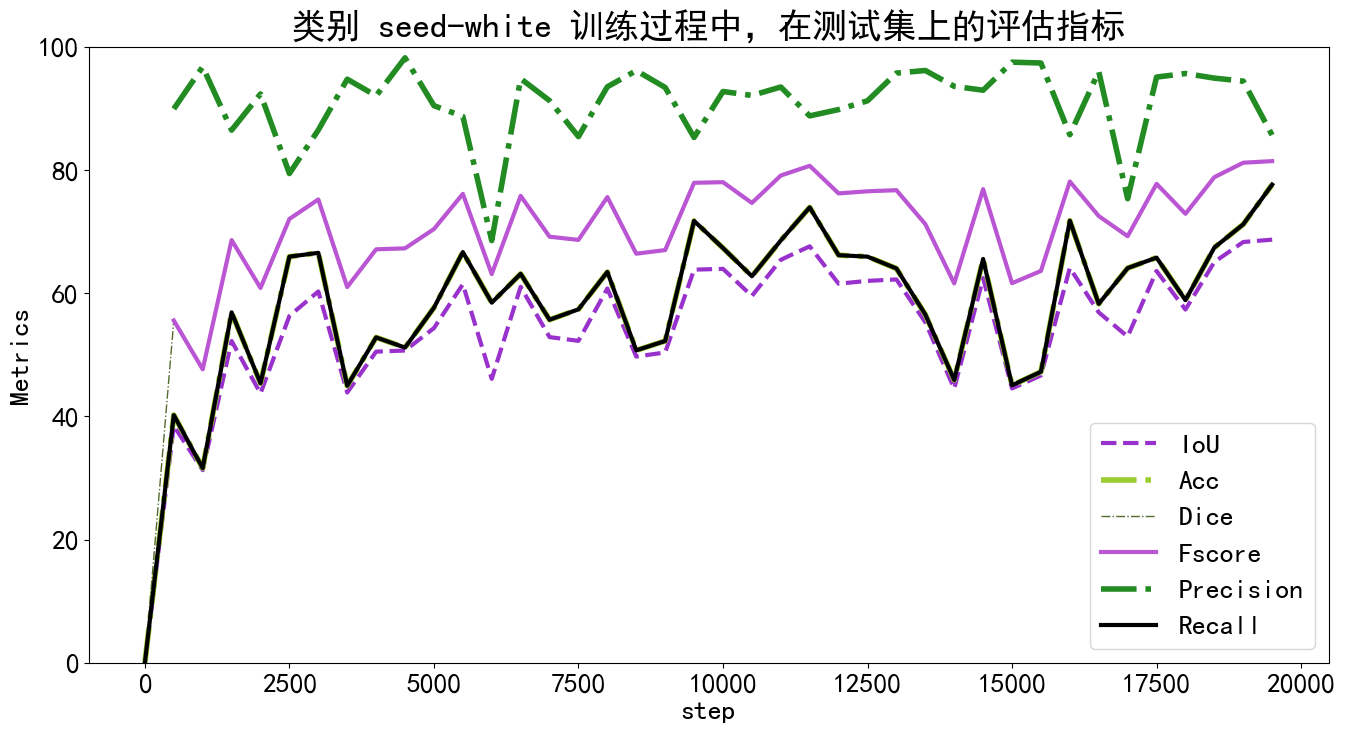

In [33]:
# x = range(0, 30000, 500)
x = range(0,20000,500)
for each_class in class_list: # 遍历每个类别
    each_class_metrics = np.array(metrics_json[each_class]['metrics'])
    if len(x) != len(each_class_metrics):
        raise ValueError('类别 {} 训练过程中，在测试集上的评估指标的长度为 {}，而x的长度为 {}，不一致！'.format(each_class, len(each_class_metrics), len(x)))
    plt.figure(figsize=(16, 8))
    for idx, each_metric in enumerate(['IoU', 'Acc', 'Dice', 'Fscore', 'Precision', 'Recall']):
        try:
            plt.plot(x, each_class_metrics[:,idx], label=each_metric, **get_line_arg())
        except:
            pass
    plt.tick_params(labelsize=20)
    plt.ylim([0, 100])
    plt.xlabel('step', fontsize=20)
    plt.ylabel('Metrics', fontsize=20)
    plt.title('类别 {} 训练过程中，在测试集上的评估指标'.format(each_class), fontsize=25)
    plt.legend(fontsize=20)
    plt.savefig('myFolder/chart/类别 {} 训练过程评估指标.pdf'.format(each_class), dpi=120, bbox_inches='tight')
    plt.show()